# SMS Spam Collection
This is a text corpus of over 5,500 English SMS messages with ~13% labeled as spam. The text file contains one message per line with two columns: the label ("ham" or "spam") and the raw text of the message. Messages labeled as "ham" are non-spam messages that can be considered legitimate. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [21]:
spam = pd.read_csv("SMSSpamCollection.csv", header=None)
print(spam.shape)
spam.head(100)

(5572, 2)


,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
95,spam,Your free ringtone is waiting to be collected....
96,ham,Watching telugu movie..wat abt u?
97,ham,i see. When we finish we have loads of loans t...
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...


[Source](https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) of dataset. This corpus was created by  [Tiago A. Almeida](https://www.servidores.ufscar.br/talmeida/) and José María Gómez Hidalgo.

**Citations**: 

- Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results.  Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011. 

- Gómez Hidalgo, J.M., Almeida, T.A., Yamakami, A. On the Validity of a New SMS Spam Collection.  Proceedings of the 11th IEEE International Conference on Machine Learning and Applications (ICMLA'12), Boca Raton, FL, USA, 2012. 

- Almeida, T.A., Gómez Hidalgo, J.M., Silva, T.P.  Towards SMS Spam Filtering: Results under a New Dataset.   International Journal of Information Security Science (IJISS), 2(1), 1-18, 2013. 

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What are the most common words in spam versus normal messages?
- 📊 **Visualize**: Create a word cloud visualizing the most common words in the dataset.
- 🔎 **Analyze**: What word is most likely to indicate that a message is spam?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You work for a telecom company that is launching a new messaging app. Unfortunately, previous spam filters that they have used are out of date and no longer effective. They have asked you whether you can use new data they have supplied to distinguish between spam and regular messages accurately. They have also told you that it is essential that regular messages are rarely, if ever, categorized as spam.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

# 1st question

Let's see which are the most commom words in spam and normal messages

In [22]:
print(f"There is {len(spam[0].unique())} label")
print(spam[0].unique()[0],"and", spam[0].unique()[1])

There is 2 label
ham and spam


In [23]:
vocabulary_label = {"ham" : {}, "spam" : {}}

for label, message in zip(spam[0], spam[1]):
    tokenized_message = message.split()
    for token in tokenized_message:
        if token not in vocabulary_label[label]:
            vocabulary_label[label][token] = 0
        vocabulary_label[label][token] += 1

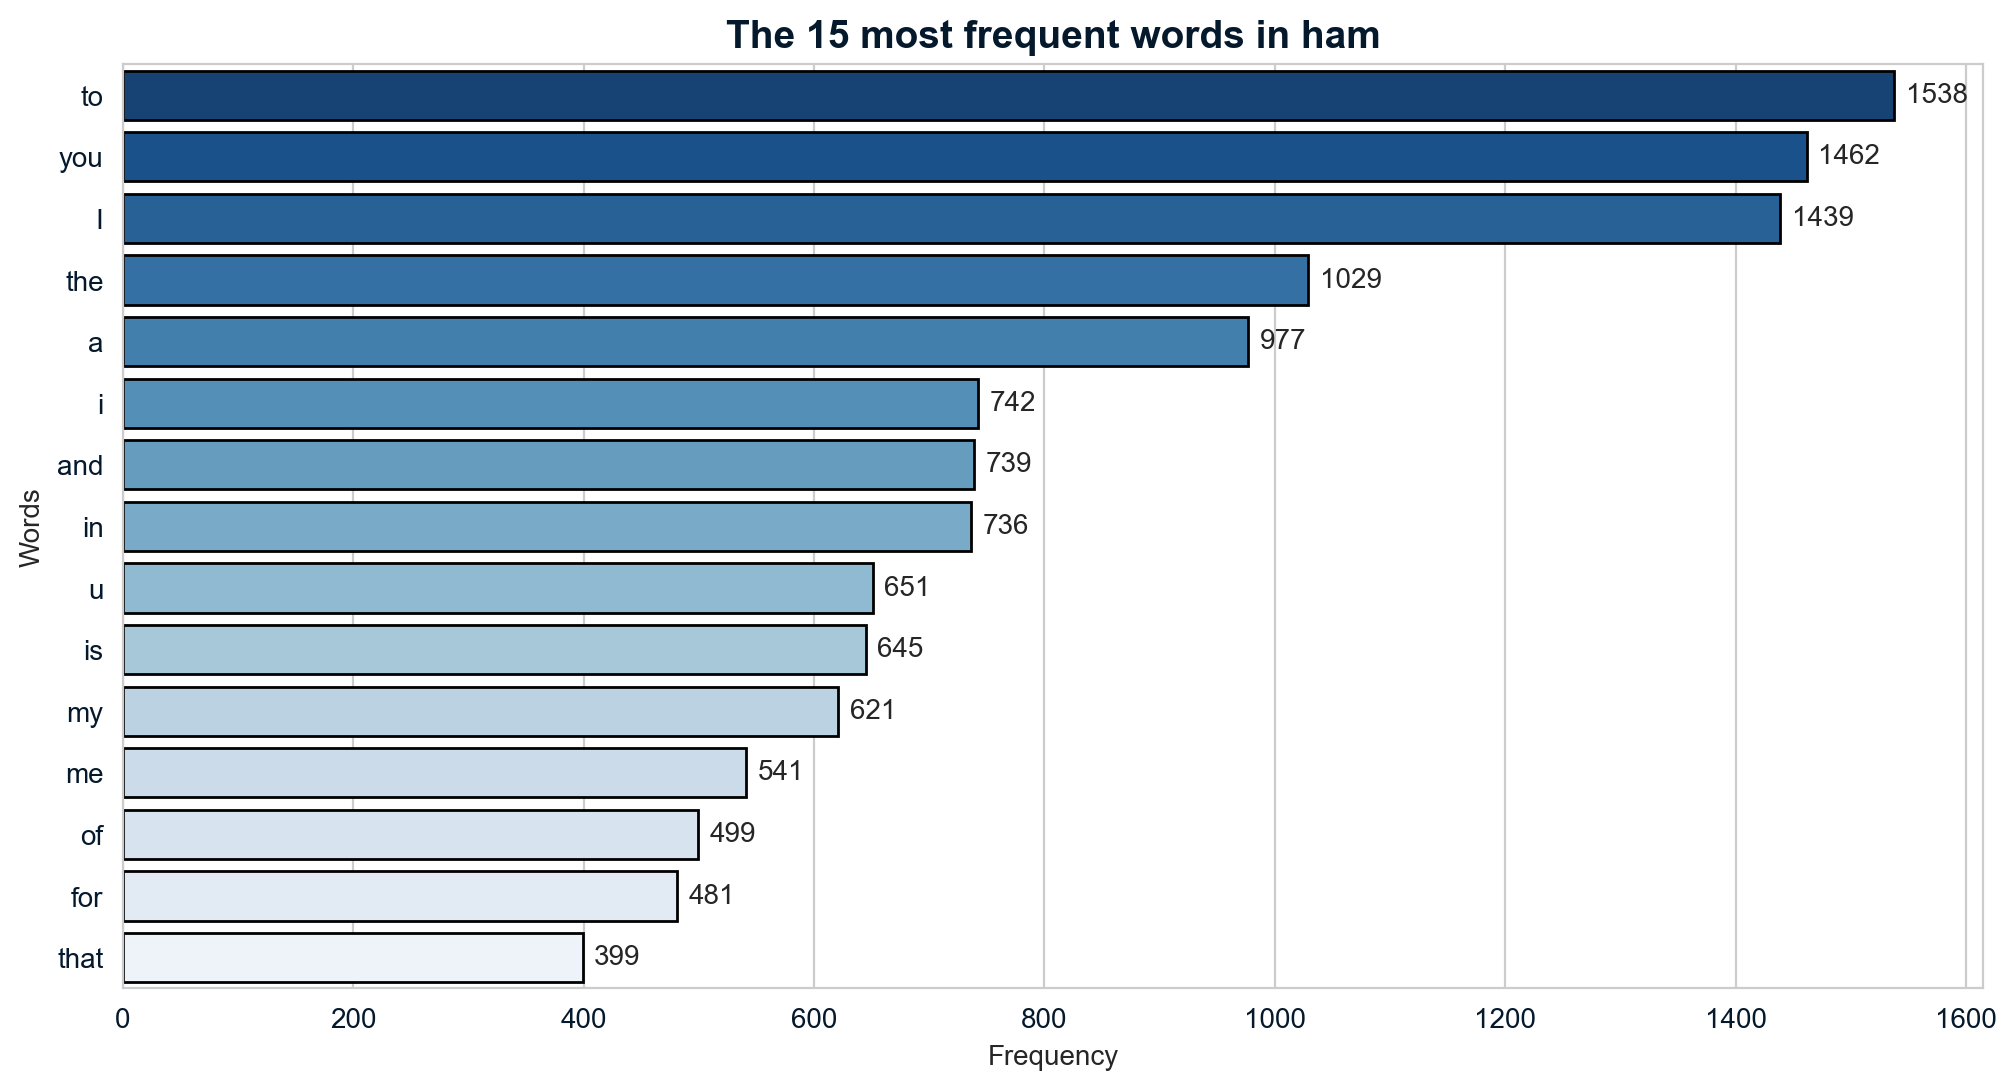

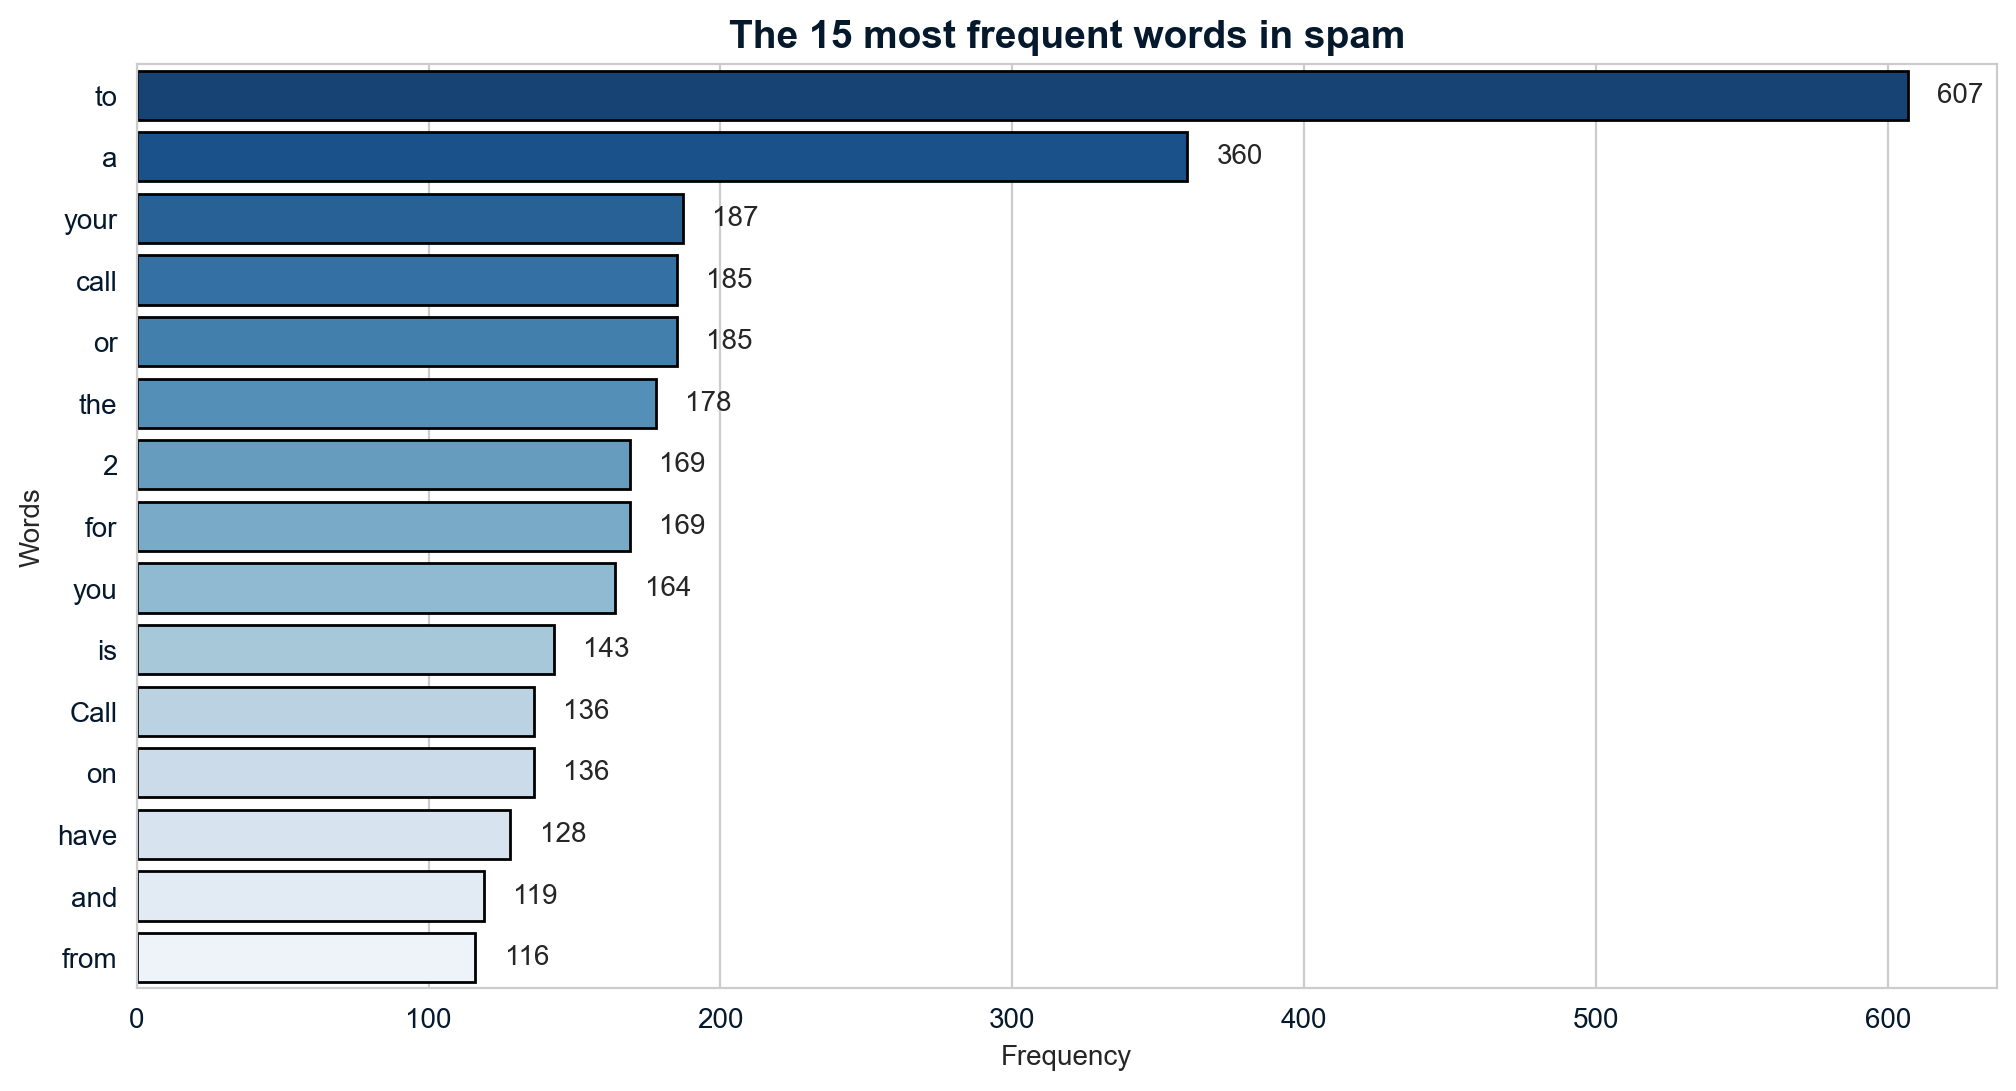

In [24]:
for label in vocabulary_label:
    sorted_data = sorted(vocabulary_label[label].items(), key=lambda x: x[1], reverse=True)[:15]
    words, frequency = zip(*sorted_data)


    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))


    ax = sns.barplot(x=frequency, y=words, palette="Blues_r", edgecolor="black")

    # Ajouter les valeurs sur les barres
    for i, v in enumerate(frequency):
        ax.text(v + 10, i, str(v), va='center', fontsize=10)


    plt.title(f"The 15 most frequent words in {label}", fontsize=14, fontweight="bold")
    plt.xlabel("Frequency")
    plt.ylabel("Words")

    plt.show()

There is a problem here, there is only small words in both type of message, it's hard to say by that if the message is a spam or not. Let's use more restriction

In [43]:
def analysis_statistic(vocabulary):
    frequency = list(vocabulary.values())


    mean = np.mean(frequency) 
    median = np.median(frequency) 
    std_dev = np.std(frequency)
    max_value = np.max(frequency)

    print(f" A word appear aroud {mean} times on average with a median of {median}, a std of {std_dev} and a max value of {max_value}")

In [44]:
for label in vocabulary_label:
    print(f"For a {label} message")
    analysis_statistic(vocabulary_label[label])

For a ham message
 A word appear aroud 5.487324167527617 times on average with a median of 1.0, a std of 35.7595435062667 and a max value of 1538
For a spam message
 A word appear aroud 4.134722222222222 times on average with a median of 1.0, a std of 15.450964788187257 and a max value of 607


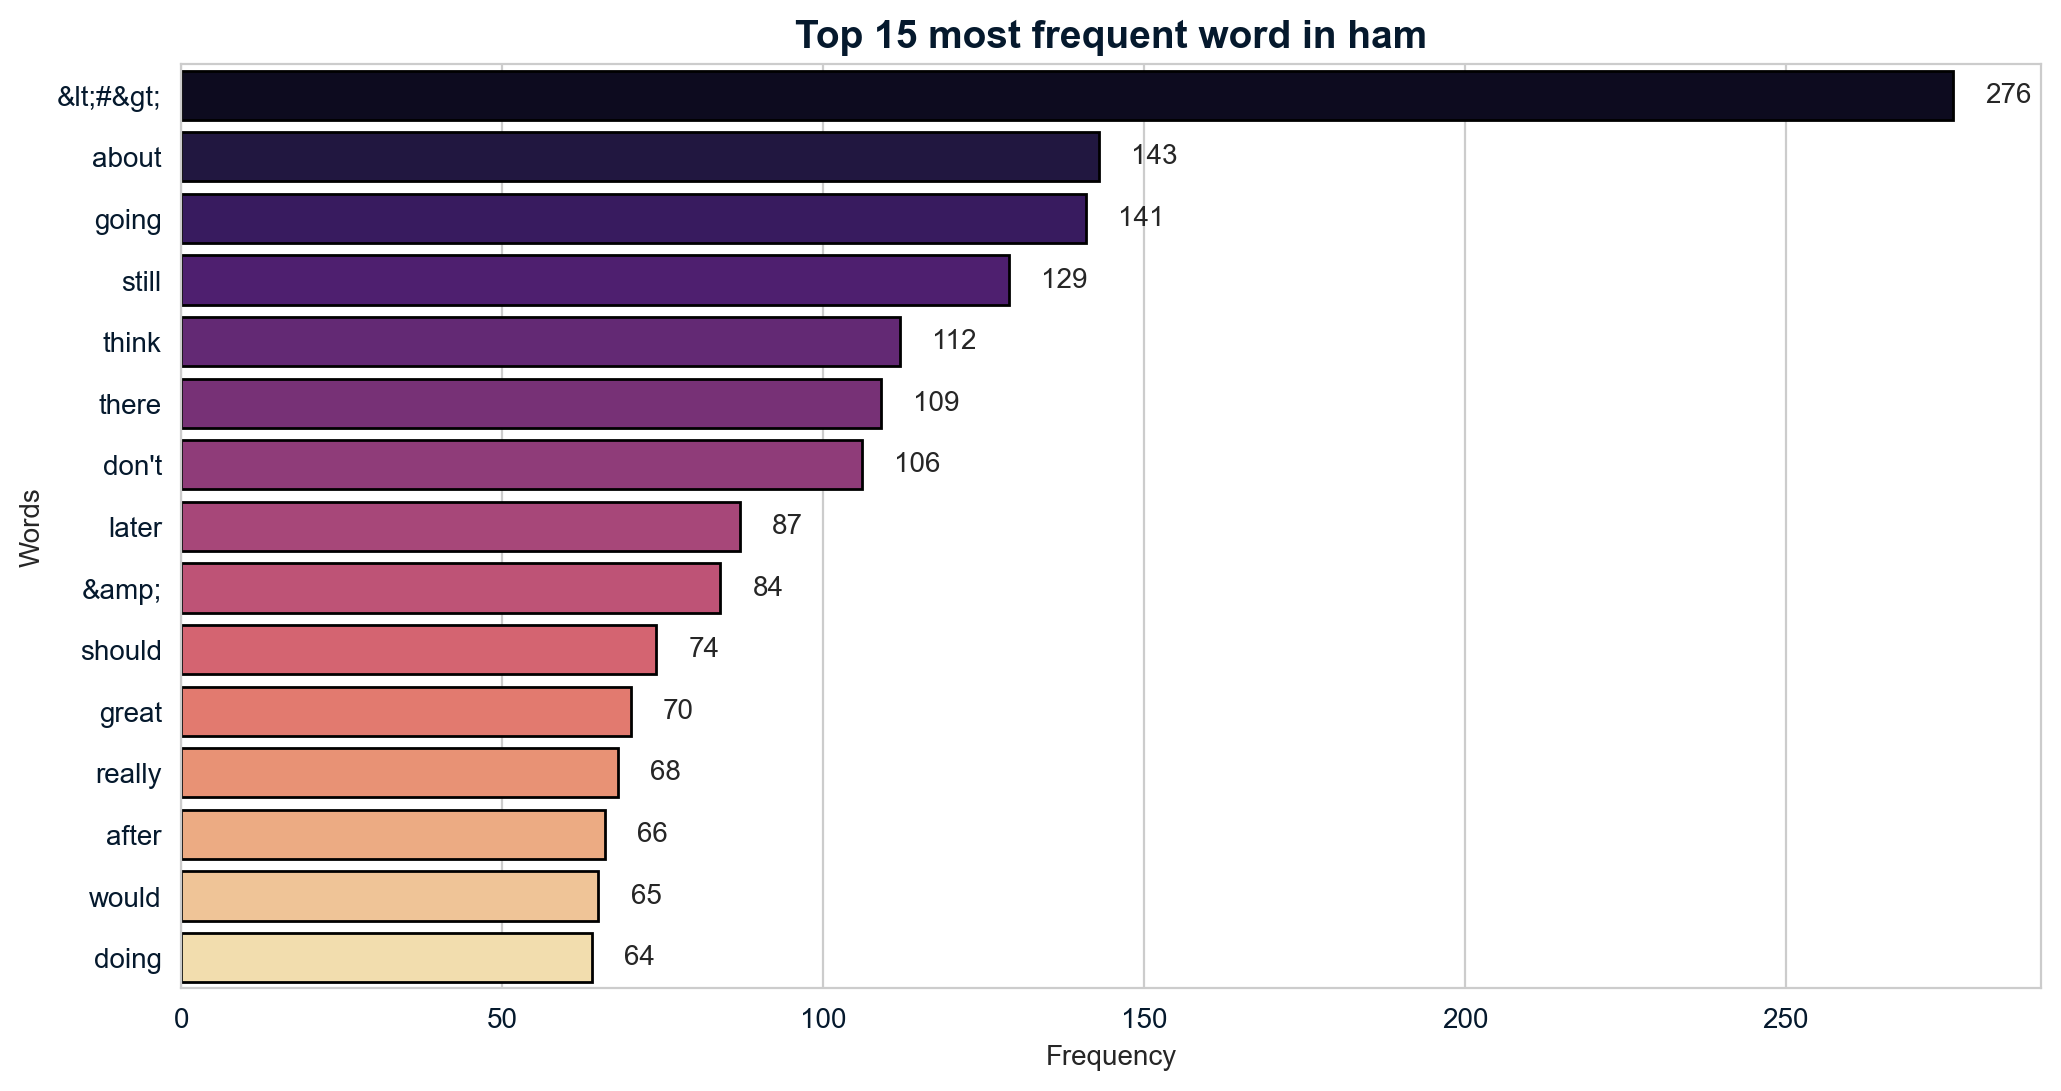

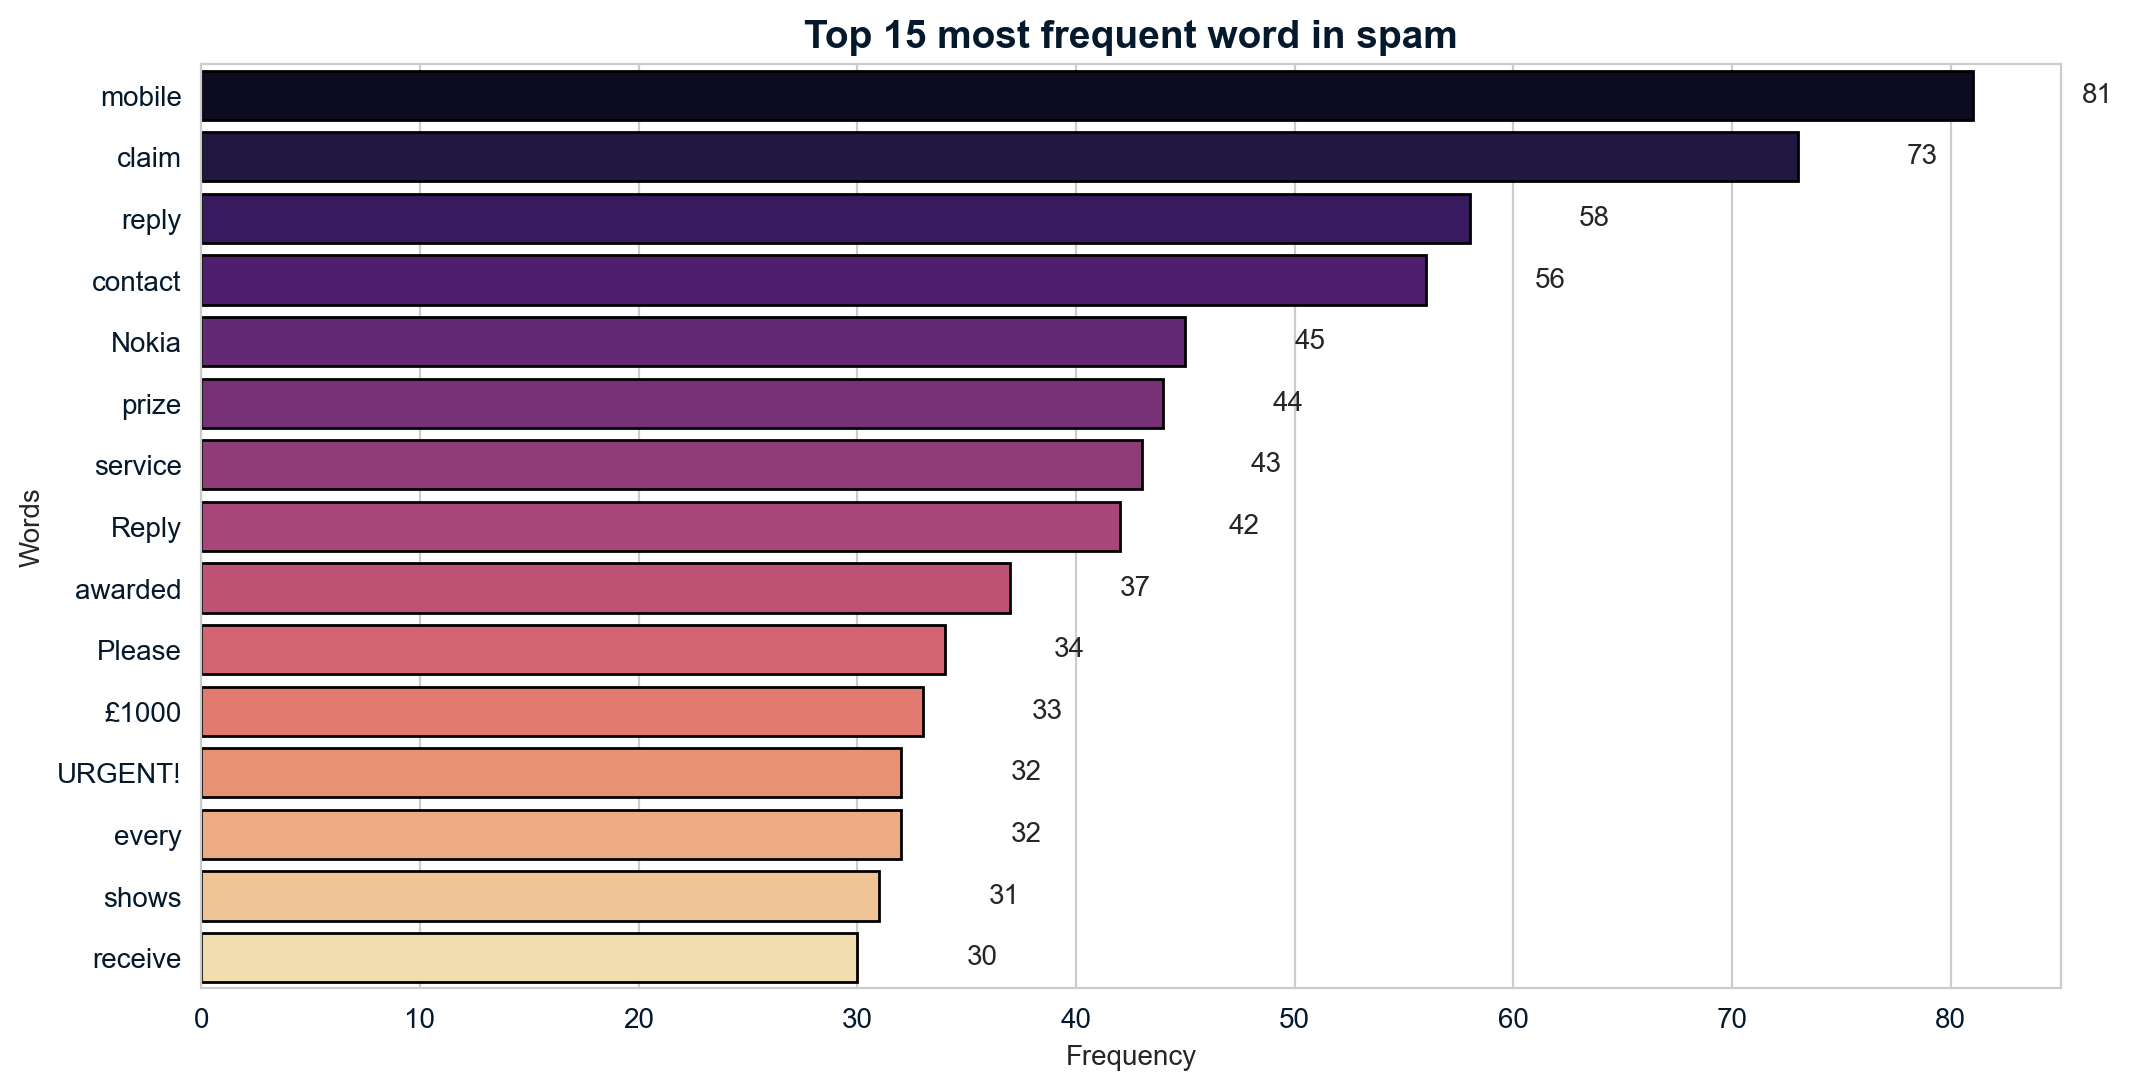

In [51]:
for label in vocabulary_label:
    filtered_data = {
        word: freq for word, freq in vocabulary_label[label].items()
        if len(word) > 4
    }


    sorted_data = sorted(filtered_data.items(), key=lambda x: x[1], reverse=True)[:15]
    words, frequency = zip(*sorted_data)


    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))


    ax = sns.barplot(x=frequency, y=words, palette="magma", edgecolor="black")


    for i, v in enumerate(frequency):
        ax.text(v + 5, i, str(v), va='center', fontsize=10)

    plt.title(f"Top 15 most frequent word in {label}", fontsize=14, fontweight="bold")
    plt.xlabel("Frequency")
    plt.ylabel("Words")

    plt.show()


In [65]:
punctuation = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
number_upper = {"ham" : 0, "spam" : 0}
number_punctuation = {"ham" : 0, "spam" : 0}
length_vocabulary = [len(vocabulary_label["ham"].values()),len(vocabulary_label["spam"].values()) ]
for label in vocabulary_label:
    for token in vocabulary_label[label]:
        if token.isupper():
            number_upper[label] += 1
        for letter in token:
            if letter in punctuation:
                number_punctuation[label] += 1
print(f"{int(100*number_upper['ham']/length_vocabulary[0])/100} % of word in ham message are upper message against {int(100*number_upper['spam']/length_vocabulary[1])/100} % in spam message")
print(f"{int(100*number_punctuation['ham']/length_vocabulary[0])/100} % of word containt punctuation expect '.' in ham message against {int(100*number_punctuation['spam']/length_vocabulary[1])/100} % in spam message")

0.08 % of word in ham message are upper message against 0.15 % in spam message
0.28 % of word containt punctuation expect '.' in ham message against 0.3 % in spam message


The most frequent word in spam are about something to claim, something urgent, they talk about money or some prize (Nokia, £1000...). In addition, in percentage, we see more often upper message in spam message than regular one.